# Clasificación con RNA

In [7]:
# Librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math


In [8]:


# importación de características y datos de procesamiento
Xpoblacional=np.load('../data/caracteristicasNormalizadasPCA.npy')
imagenesProcesadas=np.load('../data/listaImagenesProcesadas.npy')
#print(f'Imágenes procesadas:\n {imagenesProcesadas}')
nombreCaracteristicas=np.load('../data/nombreCaracteristicasNormalizadasPCA.npy')
#print(f'Nombre de características finales\n{nombreCaracteristicas}')

# Determinación de monilia, fito y saludable

n_monilia=0 # Número de monilias procesadas
n_fito=0 # ...
n_saludable=0

for tipoImagen in imagenesProcesadas:
    if tipoImagen=='monilia':
        n_monilia+=1
    elif tipoImagen=='fito':
        n_fito+=1
    else:
        n_saludable+=1

print(f'Número de fito: {n_fito}')
print(f'Número de monilia: {n_monilia}')
print(f'Número de saludable: {n_saludable}')

porcionEntrenamiento=0.7 #Porcion de entrenamiento

n_total=n_monilia+n_fito+n_saludable


if math.ceil(porcionEntrenamiento*n_monilia)<=n_monilia:
    n_monilia_entrenamiento=math.ceil(porcionEntrenamiento*n_monilia) # Número de monilias elegidas para entrenar
else:
    n_monilia_entrenamiento=n_monilia

if math.ceil(porcionEntrenamiento*n_fito)<=n_fito:
    n_fito_entrenamiento=math.ceil(porcionEntrenamiento*n_fito) 
else:
    n_fito_entrenamiento=n_fito

if math.ceil(porcionEntrenamiento*n_saludable)<=n_saludable:
    n_saludable_entrenamiento=math.ceil(porcionEntrenamiento*n_saludable)
else:
    n_saludable_entrenamiento=n_saludable

print(f'Número de fito entrenamiento: {n_fito_entrenamiento}')
print(f'Número de monilia entrenamiento: {n_monilia_entrenamiento}')
print(f'Número de saludable entrenamiento: {n_saludable_entrenamiento}')


Número de fito: 45
Número de monilia: 54
Número de saludable: 37
Número de fito entrenamiento: 32
Número de monilia entrenamiento: 38
Número de saludable entrenamiento: 26


In [12]:
# Separación características de entrenamiento y de ensayo
# Se asignó como 1 a las enfermas y 0 a las saludables biclase
# En el caso de tres clases: 0 para sana, 1 para monilia y 2 para fito

X = np.array([], float)
Y = np.array([], int)
Y3Clases = np.array([], int)


Xprueba=np.array([], float)
Yprueba= np.array([], int)
Yprueba3Clases=np.array([], int)

for contador in range(n_total):
    # X.shape
    #print(X.shape)
    if contador>=n_monilia+n_fito and contador<n_monilia+n_fito+n_saludable_entrenamiento :
        # Se eligen las saludables
        #print(f'saludable {contador}')
        X=np.append(X,Xpoblacional[contador])       
        Y=np.append(Y,0)
        Y3Clases=np.append(Y3Clases,0)

    elif contador>=n_monilia and contador<n_monilia+n_fito_entrenamiento :
        # Se eligen las fito
        #print(f'fito {contador}')
        X=np.append(X,Xpoblacional[contador])
        Y=np.append(Y,1)
        Y3Clases=np.append(Y3Clases,2)


    elif contador<n_monilia_entrenamiento:
        # Se eligen las monilias
        #print(f'monilia {contador}')
        X=np.append(X,Xpoblacional[contador])
        Y=np.append(Y,1)
        Y3Clases=np.append(Y3Clases,1)

    else:
        Xprueba=np.append(Xprueba,Xpoblacional[contador])
        
        if contador>=n_monilia+n_fito+n_saludable_entrenamiento:
            # saludable
            Yprueba=np.append(Yprueba,0)
            Yprueba3Clases=np.append(Yprueba3Clases,0)


        elif contador>=n_monilia+n_fito_entrenamiento:
            # Fito
            Yprueba=np.append(Yprueba,1)
            Yprueba3Clases=np.append(Yprueba3Clases,2)

        elif contador>=n_monilia_entrenamiento:
            # monilia
            Yprueba=np.append(Yprueba,1)
            Yprueba3Clases=np.append(Yprueba3Clases,1)


# Redimencionamiento
X.shape=(n_monilia_entrenamiento+n_fito_entrenamiento+n_saludable_entrenamiento,Xpoblacional.shape[1])
Xprueba.shape=(n_total-(n_monilia_entrenamiento+n_fito_entrenamiento+n_saludable_entrenamiento),Xpoblacional.shape[1])

# Comprobación 
# Se comparan las primeras y últimas características de las selecciondadas y las totales
if(np.all(X[0]==Xpoblacional[0]) and np.all(X[n_monilia_entrenamiento-1]==Xpoblacional[n_monilia_entrenamiento-1])):
    print(f'Se importaron bien las {imagenesProcesadas[0]}')

if(np.all(X[n_monilia_entrenamiento]==Xpoblacional[n_monilia]) and np.all(X[n_monilia_entrenamiento+n_fito_entrenamiento-1]==Xpoblacional[n_monilia+n_fito_entrenamiento-1])):
    print(f'Se importaron bien las {imagenesProcesadas[n_monilia]}')

if(np.all(X[n_monilia_entrenamiento+n_fito_entrenamiento]==Xpoblacional[n_monilia+n_fito]) and np.all(X[n_monilia_entrenamiento+n_fito_entrenamiento+n_saludable_entrenamiento-1]==Xpoblacional[n_monilia+n_fito+n_saludable_entrenamiento-1])):
    print(f'Se importaron bien las {imagenesProcesadas[n_monilia+n_fito]}')

# print(f'X.shape: {X.shape}')
# print(f'Y.shape: {Y.shape}')

# print(f'Xprueba.shape: {Xprueba.shape}')
# print(f'Yprueba.shape: {Yprueba.shape}')
print(f'Salidas de entrenamiento bi-clase: {Y}\n')
print(f'Salidas de prueba bi-clase: {Yprueba}\n')

print(f'Salidas de entrenamiento tres clases: {Y3Clases}\n')
print(f'Salidas de prueba tres clases: {Yprueba3Clases}\n')


Se importaron bien las monilia
Se importaron bien las fito
Se importaron bien las saludable
Salidas de entrenamiento bi-clase: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Salidas de prueba bi-clase: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0]

Salidas de entrenamiento tres clases: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Salidas de prueba tres clases: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0
 0 0 0]



## Entrenamiento con perceptrón

In [16]:
def entrenamientoPerceptron(X,y,interaciones):
    
    '''  
    X: Vector de características n_imagenes X m_características
    y: Vector de resultados 1Xn_imagenes
    interaciones: Número de iteraciones
    '''

    # Se le inserta al vector X una columna de unos al final
    X=np.insert(X, X.shape[1], 1,axis=1)


    # Se inicializa el vector de pesos y el bias
    np.random.seed(1)
    W = np.random.random((X.shape[1])) - 1
    
    n_caracteristicas=X.shape[1]-1
    W[n_caracteristicas]=W[n_caracteristicas]*n_caracteristicas
    y=y.T

    interacionesFinales=0
    
    for j in range(interaciones):
        
        Nerrors = 0
        #=========================
        #PASO 2
        for m in range(X.shape[0]):
            net = np.dot(X[m],W)
            
        #=========================
        #PASO 3
            if net > 0: y_cal = 1
            else: y_cal = 0
        #=========================
        #PASO 4
            error = y[m] - y_cal
            Delta = error*X[m]
            # update weights
            W[n_caracteristicas]=W[n_caracteristicas]/n_caracteristicas
            W = W + Delta
            W[n_caracteristicas]=W[n_caracteristicas]*n_caracteristicas

            # print(f'Época: {j+1}\ncaracterística: {m+1}')
            # print(f'W: {W}\n')

            if error != 0: 
                Nerrors = Nerrors+1
        
        interacionesFinales=j+1

        if Nerrors == 0: 
            break
        #===========================================
        #===========================================

    W[n_caracteristicas]=W[n_caracteristicas]/n_caracteristicas
    return [W,interacionesFinales]

iteraciones=100_000
finalW,epocas=entrenamientoPerceptron(X,Y,iteraciones)

print(f'W: {finalW[:X.shape[1]]}')
print(f'b: {finalW[X.shape[1]]}')
print(f'Épocas: {epocas}')

W: [ -36.42611525 -151.9901458   250.93918374    7.08683696  -85.44718964
   98.08057389 -108.44903391  -28.80345888  133.07127728 -960.91018264
 1168.33772885 -238.62713004 -535.15649153  753.3562431   244.44187119
  217.91110973 -250.23880946]
b: 3.558689828445752
Épocas: 100000


In [17]:
# resultados
Yevaluacion=np.array([], int)

# Se le inserta al vector Xprueba una columna de unos al final

Xevaluacion=np.insert(Xprueba, Xprueba.shape[1], 1,axis=1)
n_caracteristicas=Xevaluacion.shape[1]-1

# El vector de  pesos y el bias fue el que se obtuvo en el entrenamiento
Wevaluacion=finalW


Wevaluacion[n_caracteristicas]=Wevaluacion[n_caracteristicas]*n_caracteristicas


for m in range(Xevaluacion.shape[0]):
    net = np.dot(Xevaluacion[m],Wevaluacion)
    
    if net > 0: Yevaluacion=np.append(Yevaluacion,1) 
    else: Yevaluacion=np.append(Yevaluacion,0)

Wevaluacion[n_caracteristicas]=Wevaluacion[n_caracteristicas]/n_caracteristicas

print(f'Yevaluacion final: {Yevaluacion}')

Yevaluacion final: [0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0]


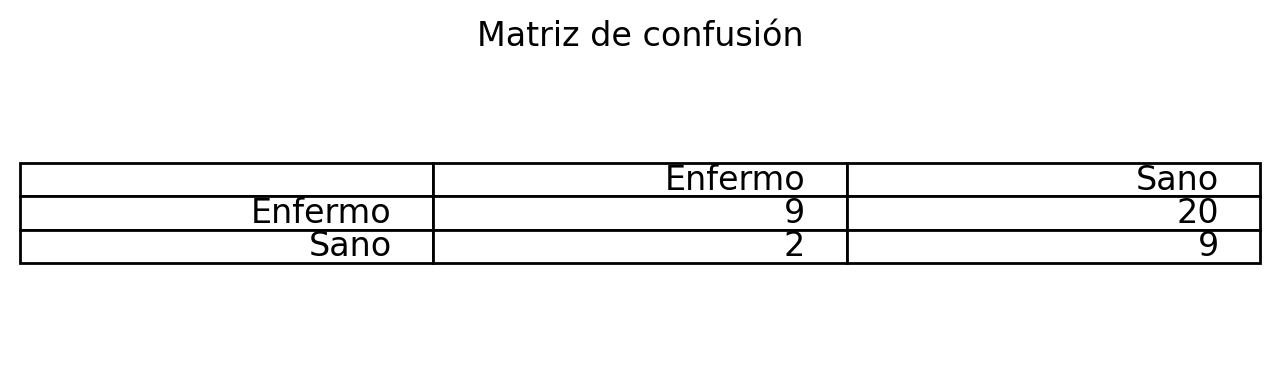

In [18]:
# Matriz ce confusión [rrr4],[rrr5]

VA=0 # Veradadera aceptación
FN=0 # Falsa negación
FA=0 # Falsa aceptación
VR=0 # Verdadero rechazo

for i in range(len(Yprueba)):

    if Yprueba[i]==1 and Yevaluacion[i]==1:
        VA+=1
    
    elif Yprueba[i]==1 and Yevaluacion[i]==0:
        FN+=1
    
    elif Yprueba[i]==0 and Yevaluacion[i]==1:
        FA+=1
    
    else:
        VR+=1
        
FR=FN # Falso rechazo    


fig = plt.figure(dpi=200,figsize=(8,2))
ax = fig.add_subplot(1,1,1)
table_data=[
    ['', 'Enfermo','Sano'],
    ['Enfermo', VA,FN],
    ['Sano', FA,VR]]
table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(12)
ax.axis('off')
ax.set_title('Matriz de confusión')
plt.show()

In [19]:
# Valores estadísticos
EM=(FA+FR)/len(Xprueba)
print(f'Error medio: {EM}')

Precision=VA/(VA+FA)
print(f'Precisión: {Precision}')

sensibilidad=VA/(VA+FR)
print(f'Sensibilidad: {sensibilidad*100} %')

especificidad=VR/(VR+FA)
print(f'Especificidad: {especificidad*100} %')

print(f'Proporción de falsa aceptación: {(1-especificidad)*100} %')

Exactitud=(VA+VR)/len(Xprueba)
print(f'Exactitud: {Exactitud*100} %')

Error medio: 0.55
Precisión: 0.8181818181818182
Sensibilidad: 31.03448275862069 %
Especificidad: 81.81818181818183 %
Proporción de falsa aceptación: 18.181818181818176 %
Exactitud: 45.0 %


## Entrenamiento con adaline

In [20]:
def funAdaline(X,y,a,errorMaximo,iteracionesMaximas):
    '''  
    X: Características n_imagenesxm_caracteristicas
    y: Vector deseado 1xm_características
    a: Constante de aprendizaje 0.1<a<1
    errorMaximo: (valor deseado-valor obtenido)^2/2<errorMaximo
    iteracionesMaximas: Máximas iteraciones
    '''
    
    # Adaptada de [rrr1]
    #A countinuación se presenta el proceso iterativo de todos los pasos descritos para ADALINE
    # MUCHAS ITERACIONES
    
    np.random.seed(1)
    W = 0.02*np.random.random((X.shape[1])) - 1

    j = 0
    iteraciones=0
    while j == 0:
        Merror = 0
        for m in range(X.shape[0]):
            y_cal = np.dot(X[m],W)
        #=========================
        #PASO 3
            error = y[m] - y_cal
            Delta = a * error * X[m] 
        #=========================
        #PASO 4
            # update weights
            W = W + Delta
            Merror = Merror + np.absolute(error)
        if Merror < errorMaximo: 
            j = 1
        elif iteraciones>=iteracionesMaximas:
            j=1

        iteraciones+=1
        #===========================================
        #===========================================

    print(j)
    print(f'iteraciones: {iteraciones}')
    print(f'error: {Merror/X.shape[0]}')
    # print (f"W: {W}")

    return [W,Merror/X.shape[0]]

a=0.01
errorMaximo=0.1
iteracionesMaximas=100_000
W_funAdaline,errorP_funAdaline=funAdaline(X,Y,a,errorMaximo,iteracionesMaximas)


1
iteraciones: 100001
error: 0.30599398076861417


In [21]:
## Evaluación de resultado

Yevaluacion=np.array([], int)

for m in range(Xprueba.shape[0]):
    y_cal = np.dot(Xprueba[m],W_funAdaline)

    if y_cal>errorP_funAdaline:
        Yevaluacion=np.append(Yevaluacion,1)
    else:
        Yevaluacion=np.append(Yevaluacion,0) 



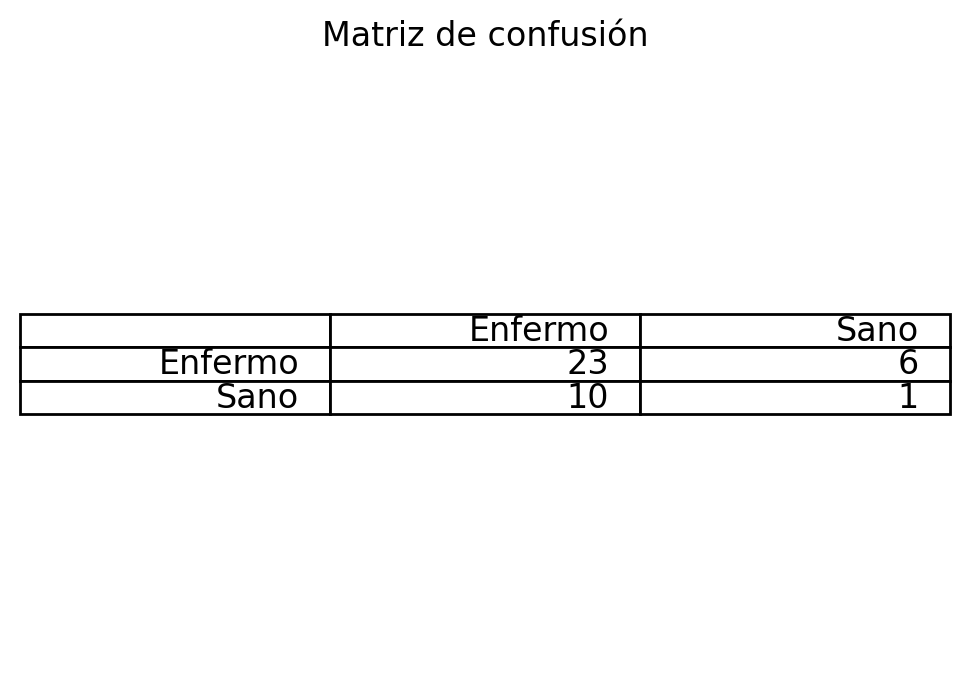

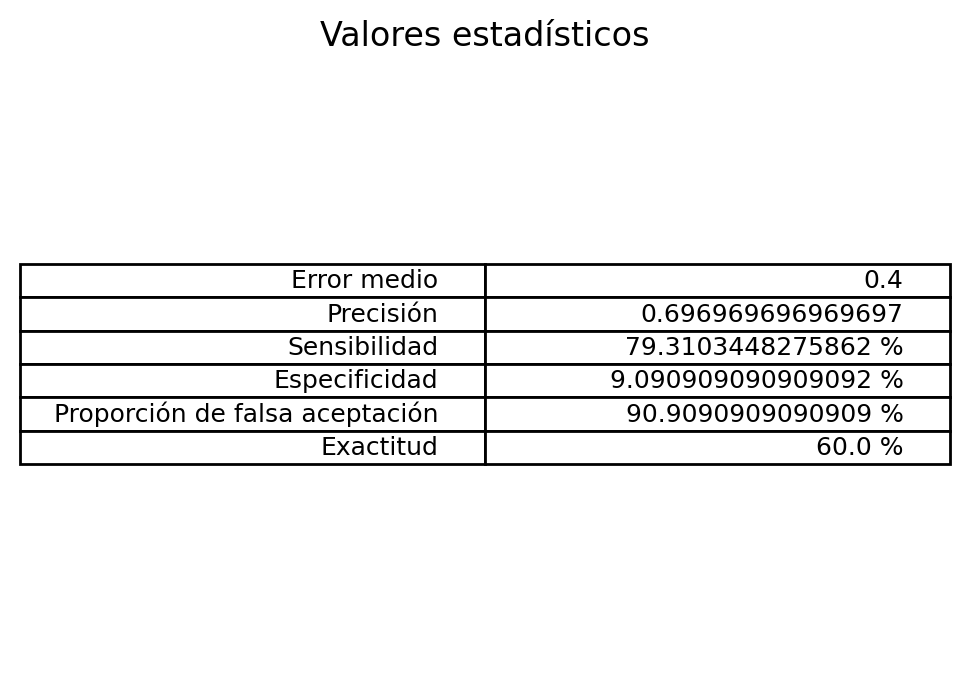

In [22]:
## Matriz de confusión y valores estadísticos 

def matrizConfusion(Yprueba,Yevaluacion):

    '''  
    Yprueba: Resultados de verderos
    Yevaluacion: Resultados de evaluación
    '''

    # Matriz ce confusión [4],[5]

    VA=0 # Veradadera aceptación
    FN=0 # Falsa negación
    FA=0 # Falsa aceptación
    VR=0 # Verdadero rechazo

    for i in range(len(Yprueba)):

        if Yprueba[i]==1 and Yevaluacion[i]==1:
            VA+=1
        
        elif Yprueba[i]==1 and Yevaluacion[i]==0:
            FN+=1
        
        elif Yprueba[i]==0 and Yevaluacion[i]==1:
            FA+=1
        
        else:
            VR+=1
            
    FR=FN # Falso rechazo    



    fig = plt.figure(dpi=200)
    ax = fig.add_subplot(1,1,1)
    table_matrizConfusion=[
        ['', 'Enfermo','Sano'],
        ['Enfermo', VA,FN],
        ['Sano', FA,VR]]
    table = ax.table(cellText=table_matrizConfusion, loc='center',rowLoc='left')
    table.set_fontsize(12)
    ax.axis('off')
    ax.set_title('Matriz de confusión')

    plt.show()

    return [VA,FA,FR,VR]


def valoresEstadisticos(Yprueba,VA,FA,FR,VR):
    '''   
    Yprueba: Vector de resultados de prueba. 
    VA: Verdadera aceptación 
    FA: Falsa aceptación 
    FR: Falso rechazo 
    VR: Verdadero rechazo
    '''

    # Cálculo de valores estadísticos
    EM=(FA+FR)/len(Yprueba)

    Precision=VA/(VA+FA)
  

    sensibilidad=VA/(VA+FR)


    especificidad=VR/(VR+FA)
 
    Exactitud=(VA+VR)/len(Yprueba)
    fig = plt.figure(dpi=200)
    ax = fig.add_subplot(1,1,1)

    table_valoresEstadisticos=[
    ['Error medio', EM],
    ['Precisión',Precision],
    ['Sensibilidad',f'{sensibilidad*100} %'],
    ['Especificidad',f'{especificidad*100} %'],
    ['Proporción de falsa aceptación',f'{(1-especificidad)*100} %'],
    ['Exactitud',f'{Exactitud*100} %']]

    table = ax.table(cellText=table_valoresEstadisticos, loc='center',
    rowLoc='left')
    table.set_fontsize(12)
    ax.axis('off')
    ax.set_title('Valores estadísticos')

    plt.show()


[VA_adaline,FA_adaline,FR_adaline,VR_adaline]=matrizConfusion(Yprueba,Yevaluacion)
valoresEstadisticos(Yprueba,VA_adaline,FA_adaline,FR_adaline,VR_adaline)

